In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("1619242099-5e748a2d5fc288e9f69c5f86.csv")
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
data.shape

(461, 17)

In [ ]:
data['fpl_sel'] = data['fpl_sel'].replace('%','',regex=True).astype('float')/10
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,1.71,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.56,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.59,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.15,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.07,121,2.0,France,0,4,1,1,0


In [ ]:
output_var = 'market_value'

In [ ]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,0.324425,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,0.567566,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,0.020000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,0.100000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,0.330000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,4.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
corr = data.corr()
corr

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,-0.003018,0.187785,0.086430,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,0.017437,-0.084682,-0.062474,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.548703,0.615155,0.101659,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.524926,0.542464,0.031055,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.504888,0.618837,0.082429,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_sel,-0.003018,0.017437,0.548703,0.524926,0.504888,1.000000,0.517008,-0.053243,0.079416,-0.010506,-0.033063,0.269498,-0.026993
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,0.517008,1.000000,-0.006712,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.086430,-0.062474,0.101659,0.031055,0.082429,-0.053243,-0.006712,1.000000,0.050903,0.089980,0.068671,0.039080,0.176746
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,0.079416,-0.204837,0.050903,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,-0.010506,0.176572,0.089980,-0.113998,1.000000,-0.004668,-0.113835,-0.076102


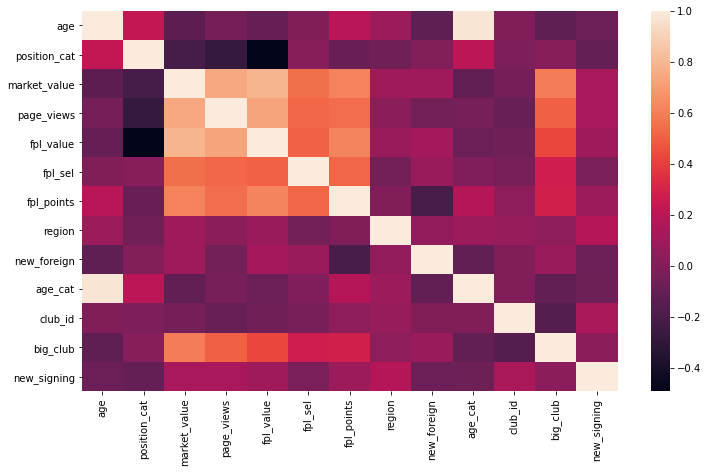

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corr)
plt.show()

#### columns like name, region, new_foreign, age_cat, club_id has the least correlation so those columns will be dropped

In [ ]:
data=data.drop(columns=['name','region','new_foreign','age_cat','club_id','nationality'])
data

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club,new_signing
0,Arsenal,28,LW,1,65.0,4329,12.0,1.71,264,1,0
1,Arsenal,28,AM,1,50.0,4395,9.5,0.56,167,1,0
2,Arsenal,35,GK,4,7.0,1529,5.5,0.59,134,1,0
3,Arsenal,28,RW,1,20.0,2393,7.5,0.15,122,1,0
4,Arsenal,31,CB,3,22.0,912,6.0,0.07,121,1,0
...,...,...,...,...,...,...,...,...,...,...,...
456,West+Ham,21,CM,2,5.0,288,4.5,0.04,38,0,1
457,West+Ham,23,LB,3,7.0,199,4.5,0.02,34,0,1
458,West+Ham,23,RB,3,4.5,198,4.5,0.03,29,0,0
459,West+Ham,21,CF,1,1.0,412,4.5,0.59,16,0,1


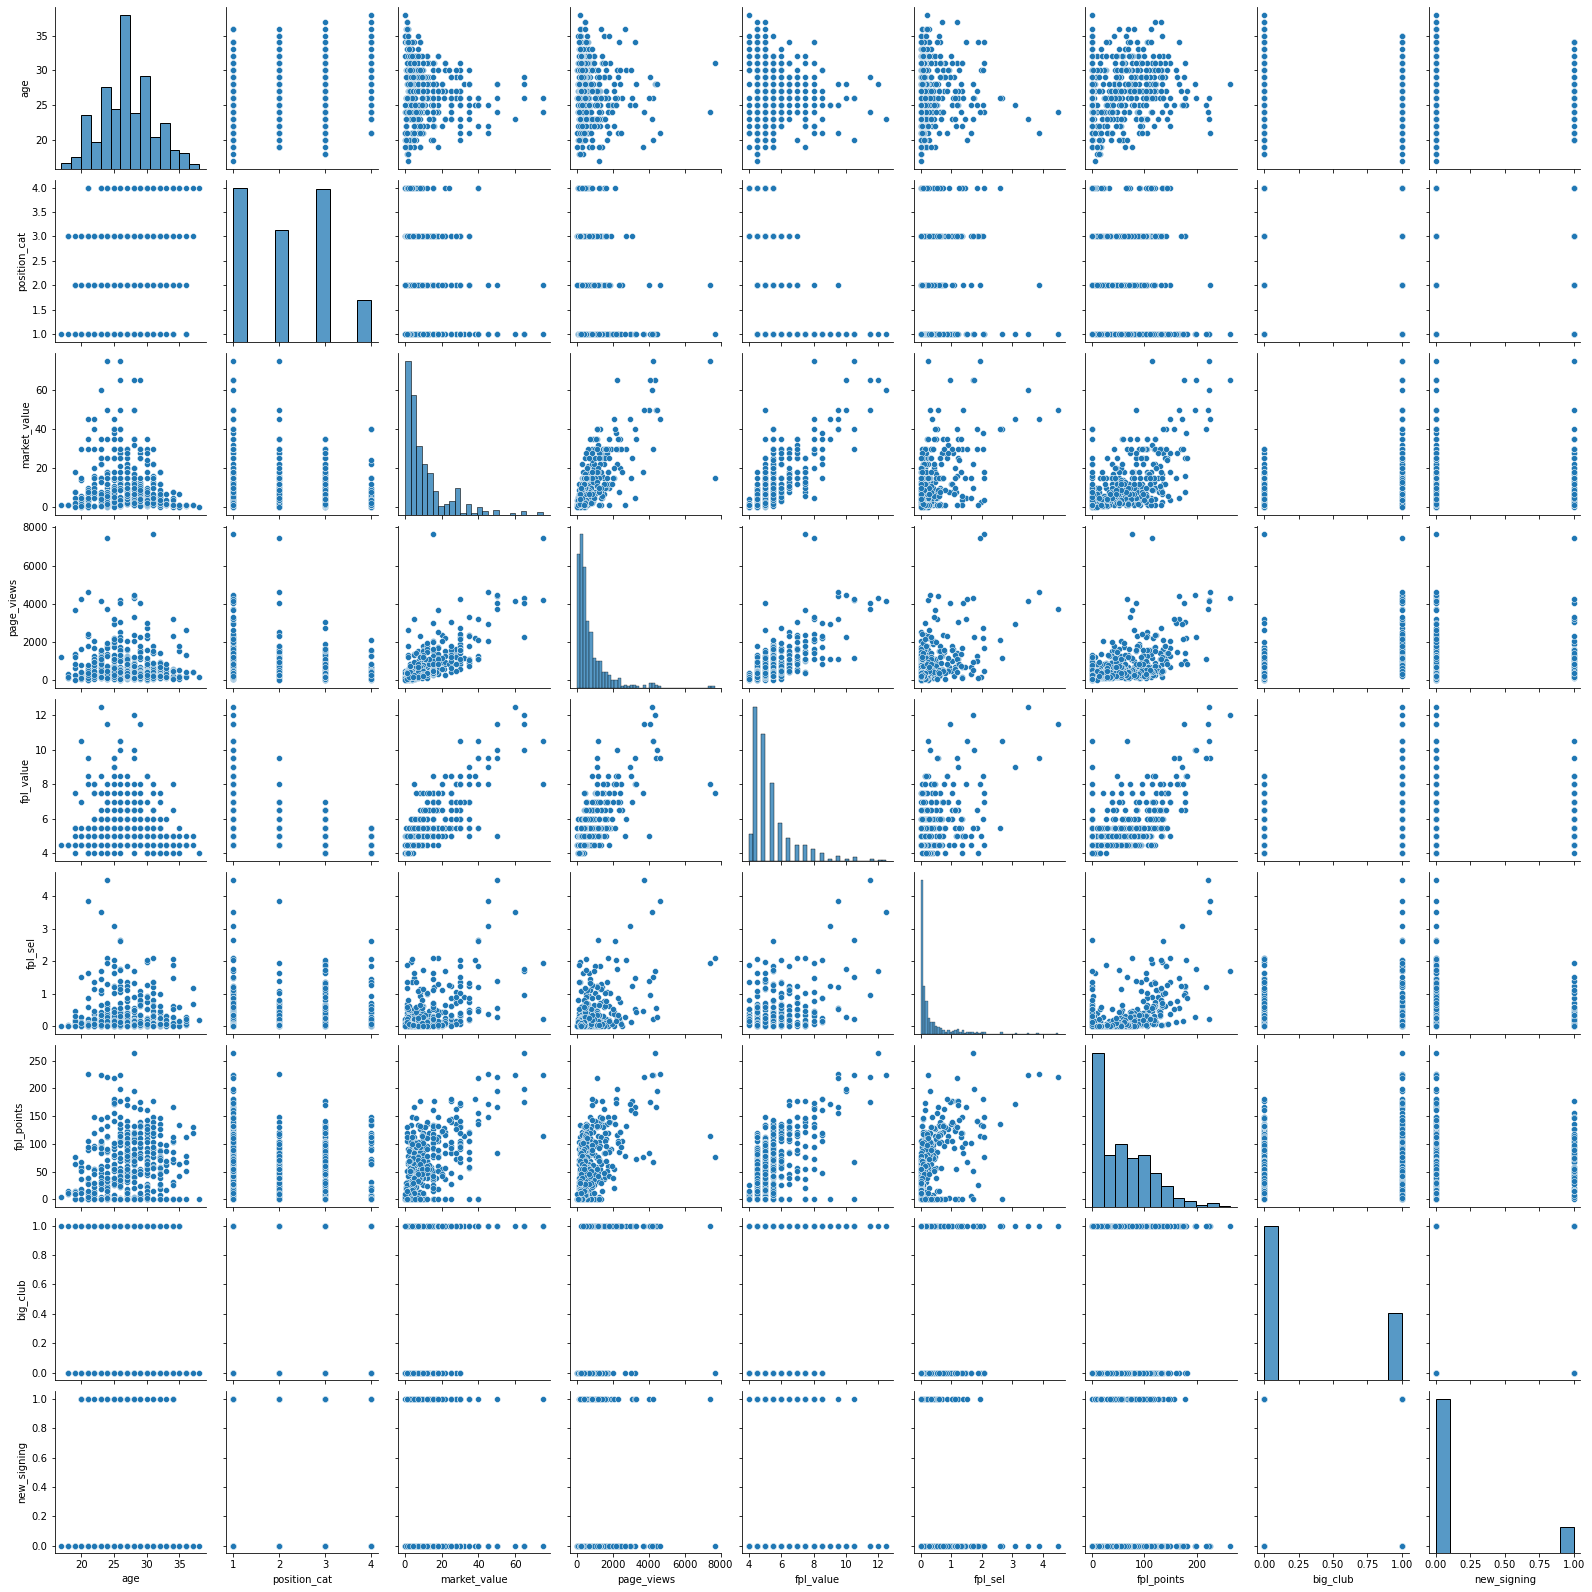

In [ ]:
sns.pairplot(data,height=2.5);

In [ ]:
print('Number of clubs:',data['club'].value_counts().shape[0])
print('Number of positions:',data['position'].value_counts().shape[0])

Number of clubs: 20
Number of positions: 13


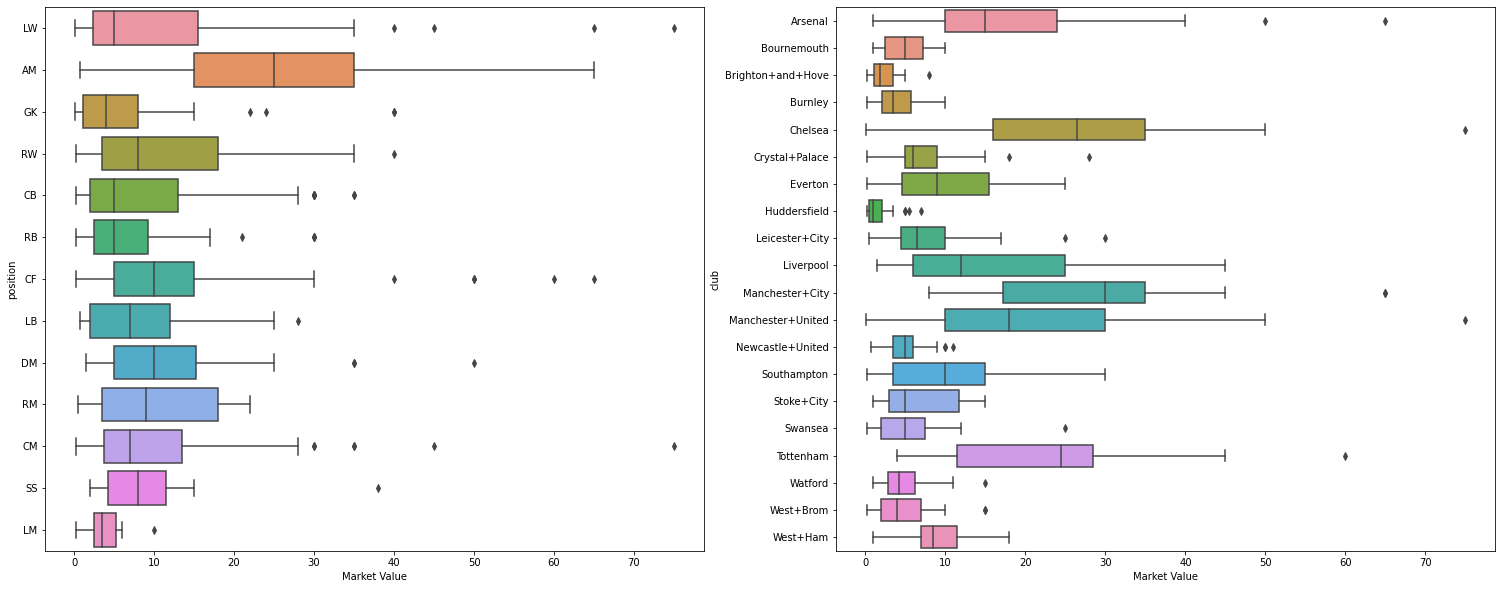

In [ ]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.boxplot(y='position',x=output_var,data=data,orient='h')
plt.xlabel("Market Value")

plt.subplot(1,2,2)
sns.boxplot(y='club',x=output_var,data=data,orient='h')
plt.xlabel("Market Value")

plt.show()

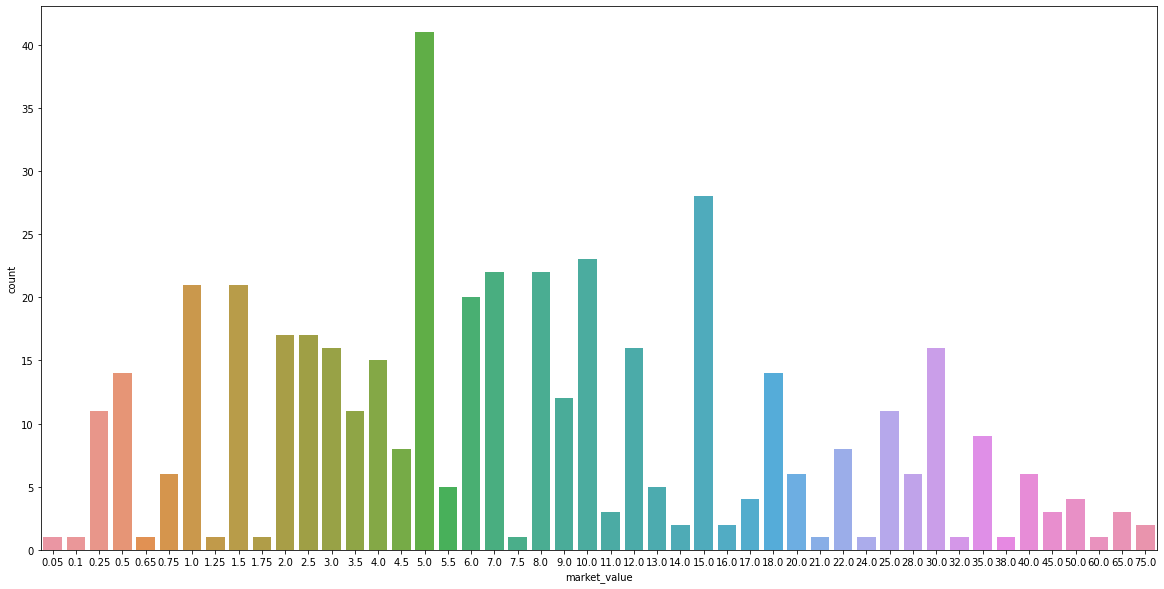

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=data[output_var])
plt.show()

# Model Building 

In [ ]:
encoded_data=data.copy()
label_encoder=preprocessing.LabelEncoder()
encoded_data['club']=label_encoder.fit_transform(encoded_data['club'])
encoded_data['position']=label_encoder.fit_transform(encoded_data['position'])
encoded_data.head()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club,new_signing
0,0,28,8,1,65.0,4329,12.0,1.71,264,1,0
1,0,28,0,1,50.0,4395,9.5,0.56,167,1,0
2,0,35,5,4,7.0,1529,5.5,0.59,134,1,0
3,0,28,11,1,20.0,2393,7.5,0.15,122,1,0
4,0,31,1,3,22.0,912,6.0,0.07,121,1,0


In [ ]:
data_club=data['club'].unique()
en_data_club=encoded_data['club'].unique()
club_map={}
for i in range(len(data_club)):
    club_map[en_data_club[i]]=data_club[i]
club_map

{0: 'Arsenal',
 1: 'Bournemouth',
 2: 'Brighton+and+Hove',
 3: 'Burnley',
 4: 'Chelsea',
 5: 'Crystal+Palace',
 6: 'Everton',
 7: 'Huddersfield',
 8: 'Leicester+City',
 9: 'Liverpool',
 10: 'Manchester+City',
 11: 'Manchester+United',
 12: 'Newcastle+United',
 13: 'Southampton',
 14: 'Stoke+City',
 15: 'Swansea',
 16: 'Tottenham',
 17: 'Watford',
 18: 'West+Brom',
 19: 'West+Ham'}

In [ ]:
data_pos=data['position'].unique()
en_data_pos=encoded_data['position'].unique()
pos_map={}
for i in range(len(data_pos)):
    pos_map[en_data_pos[i]]=data_pos[i]
pos_map

{8: 'LW',
 0: 'AM',
 5: 'GK',
 11: 'RW',
 1: 'CB',
 9: 'RB',
 2: 'CF',
 6: 'LB',
 4: 'DM',
 10: 'RM',
 3: 'CM',
 12: 'SS',
 7: 'LM'}

In [ ]:
encoded_data.isnull().sum()

club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
big_club        0
new_signing     0
dtype: int64

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]])
Y = encoded_data[[output_var]]

In [ ]:
np.random.seed(37) # Set seed
x_train, x_test,y_train,y_test= train_test_split(X, Y, test_size = 0.25)

In [ ]:
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (345, 10)
Shape of x_test:  (116, 10)
Shape of y_train:  (345, 1)
Shape of y_test:  (116, 1)


#### Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Regression_Linear = LinearRegression(normalize=True)
print(Regression_Linear.get_params())
print(Regression_Linear.fit(x_train,y_train))
pred_linear = Regression_Linear.predict(x_test)
print("MSE score:",mean_squared_error(y_test,pred_linear))
lr_r2=r2_score(y_test,pred_linear)
print("R2 score:",lr_r2)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
LinearRegression(normalize=True)
MSE score: 38.78351969976835
R2 score: 0.7868709049165502


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeReg=DecisionTreeRegressor()
DecisionTreeReg.fit(x_train,y_train)
pred_tree=DecisionTreeReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_tree)))
tree_r2=r2_score(y_test, pred_tree)
print("R2 score:",tree_r2)

MSE score: 9.88618419467463
R2 score: 0.46290276488586535


 #### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForestReg=RandomForestRegressor()
RandomForestReg.fit(x_train,y_train)
pred_forest=RandomForestReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_forest)))
rf_r2=r2_score(y_test, pred_forest)
print("R2 score:",rf_r2)


MSE score: 6.063991966077723
R2 score: 0.7979249217408785


/var/folders/6w/3bdj6gnx0tg0ryg6t_ykcx9r0000gn/T/ipykernel_38941/2921284874.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestReg.fit(x_train,y_train)


#### Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_lasso= model_lasso.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_lasso)))
lasso_r2=r2_score(y_test, pred_lasso)
print("R2 score:",lasso_r2)

MSE score: 6.286982018477031
R2 score: 0.7827899289757931


#### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
SupportVectorReg=SVR()
SupportVectorReg.fit(x_train,y_train)
pred_SVR=SupportVectorReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_SVR)))
svm_r2=r2_score(y_test, pred_SVR)
print("R2 score:",svm_r2)

In [ ]:
Model = ['Linear Reg', 'Dec Tree', 'Random Forest', 'Lasso Reg', 'SVM']
R2_Score = [lr_r2, tree_r2, rf_r2, lasso_r2, svm_r2]
index = np.arange(len(Model))

plt.bar(index, R2_Score, label="R2 Score", color = 'green')

plt.xticks(index, Model, rotation = '90')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score')
plt.legend()
plt.show()

# Deployment

In [ ]:
from flask import Flask,jsonify,request,render_template
from flask_restful import reqparse, abort, Api, Resource
import joblib
import pickle

In [ ]:
pickle.dump(RandomForestReg,open('rf_model.pkl','wb'))

In [ ]:
load_rf_model=pickle.load(open('rf_model.pkl','rb'))

In [ ]:
score=load_rf_model.score(x_test,y_test)
score

0.7979249217408785

In [ ]:
app = Flask(__name__)

In [ ]:
@app.route('/')
def loadPage():
    return render_template('home.html',query="")

@app.route('/',methods=['POST'])
def predict():
    inputQuery1=request.form['query1']
    inputQuery2=request.form['query2']
    inputQuery3=request.form['query3']
    inputQuery4=request.form['query4']
    inputQuery5=request.form['query5']
    inputQuery6=request.form['query6']
    inputQuery7=request.form['query7']
    inputQuery8=request.form['query8']
    inputQuery9=request.form['query9']
    inputQuery10=request.form['query10']
    
    #RandomForestReg=pickle.load(open('rf_model.pkl','rb'))
    
    data=[[inputQuery1,inputQuery2,inputQuery3,inputQuery4,inputQuery5,
           inputQuery6,inputQuery7,inputQuery8,inputQuery9,inputQuery10]]
    new_data_df=pd.DataFrame(data,columns=['club', 'age', 'position', 'position_cat', 'page_views', 
                                           'fpl_value', 'fpl_sel', 'fpl_points', 'big_club', 'new_signing'])
    new_pred=RandomForestReg.predict(new_data_df)[0]
    
    return render_template('home.html',output=new_pred, query1=request.form['query1'],
                           query2=request.form['query2'], query3=request.form['query3'],
                           query4=request.form['query4'], query5=request.form['query5'],
                           query6=request.form['query6'], query7=request.form['query7'],
                           query8=request.form['query8'], query9=request.form['query9'], 
                           query10=request.form['query10'])
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Oct/2021 03:14:05] "GET / HTTP/1.1" 200 -
